In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<IPython.core.display.Javascript object>

In [4]:
X = df.drop(columns=["species"])
y = df["species"]

<IPython.core.display.Javascript object>

In [5]:
# sử dụng Decision Tree
# để dự đoán species theo các chỉ số: sepal_length, sepal_width, petal_length, petal_width

<IPython.core.display.Javascript object>

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

### Cross

In [27]:
from random import randint

# thực hiện công việc này nhiều lần
# bằng cách thêm 1 vòng lặp chạy 10 lần cho đoạn code này
# sử dụng dictionary để lưu lại kết quả cho mỗi lần chạy
# có các tỷ lệ 70%, 75%, 80% cho trainning và 30%, 25%, 20% cho Test
lst_test_size = [0.3, 0.25, 0.2]


for i in lst_test_size:
    for _ in range(10):
        value = randint(1, X.size)

    # phân tách dữ liệu theo từng tỷ lệ để build model
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=i, random_state=value
    )  # nhớ phải có test_size và sau mỗi loop thì là 1 test size khác nha
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # acc = accuracy_score()
    train_score = round(model.score(X_train, y_train), 2)
    test_score = round(model.score(X_test, y_test), 2)

    print(
        "* tỷ lệ [",
        1 - i,
        ":",
        i,
        "], score train:",
        train_score,
        ", score test:",
        test_score,
        " diff of train-test:",
        abs(train_score - test_score),
    )

* tỷ lệ [ 0.7 : 0.3 ], score train: 1.0 , score test: 0.93  diff of train-test: 0.06999999999999995
* tỷ lệ [ 0.75 : 0.25 ], score train: 1.0 , score test: 0.95  diff of train-test: 0.050000000000000044
* tỷ lệ [ 0.8 : 0.2 ], score train: 1.0 , score test: 0.93  diff of train-test: 0.06999999999999995


<IPython.core.display.Javascript object>

In [28]:
"""
vd: 0.06, 0.05, 0.06

=> tỉ lệ tốt nhất là 75-25 (độ chênh lệch giữa score train và test là thấp nhất (0.06))
"""

'\nvd: 0.06, 0.05, 0.06\n\n=> tỉ lệ tốt nhất là 75-25 (độ chênh lệch giữa score train và test là thấp nhất (0.06))\n'

<IPython.core.display.Javascript object>

In [12]:
"""
=> # sau khi chạy n lần
# so sánh kết quả của n lần chạy giữa các tỷ lệ 70-30, 25-25 và 80-20
# chọn ra tỷ lệ có kết quả tốt nhất
"""

'\n=> # sau khi chạy n lần\n# so sánh kết quả của n lần chạy giữa các tỷ lệ 70-30, 25-25 và 80-20\n# chọn ra tỷ lệ có kết quả tốt nhất\n'

<IPython.core.display.Javascript object>

### K-Ford

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

<IPython.core.display.Javascript object>

In [47]:
model_k = DecisionTreeClassifier()  # dùng thuật toán nào cũng dc:))
kfold = KFold(n_splits=10)  # phân chia thành 10 lần (mặc định là 5)
results = cross_val_score(
    model_k, X, y, cv=kfold  # cv: xác thực bao nhiêu lần
)  # val_score: nếu model là classification thì trả về Accuracy, còn regression thì trả về R-score (R^2)
print("Accuracy: %.2f%% - std: %.2f%%" % (results.mean() * 100, results.std() * 100))

Accuracy: 93.33% - std: 7.89%


<IPython.core.display.Javascript object>

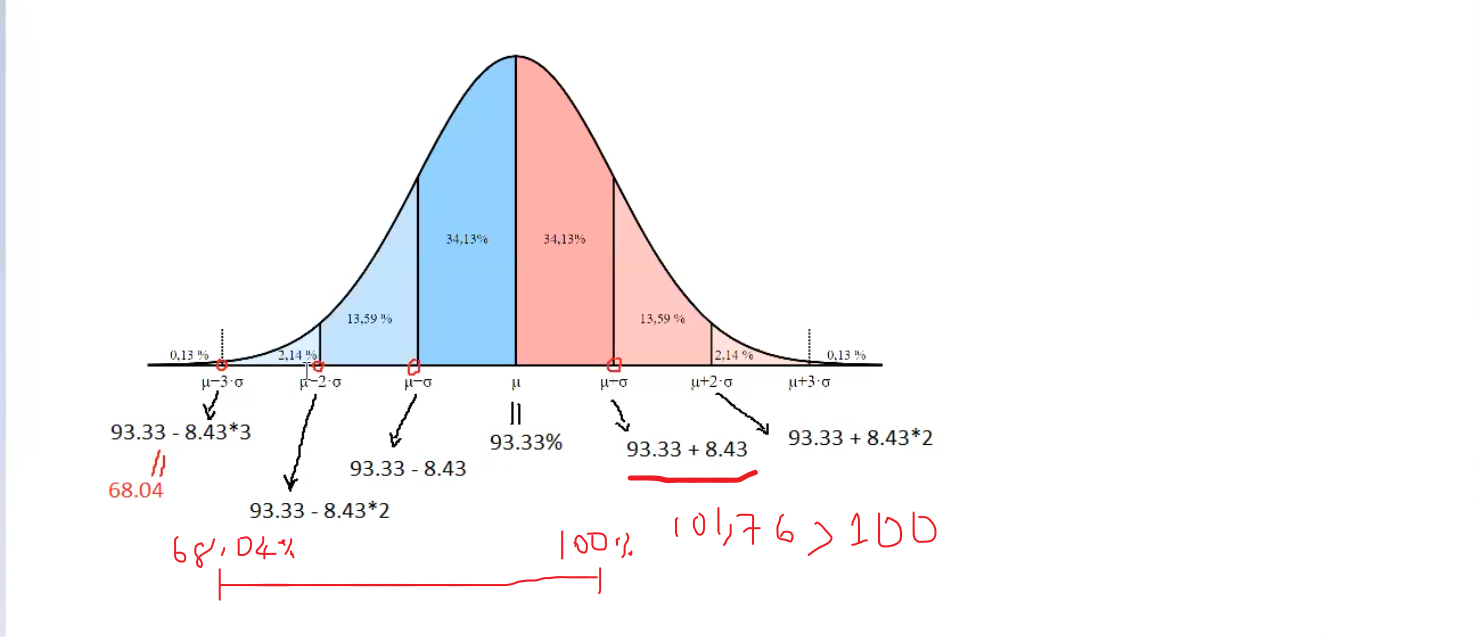

<IPython.core.display.Javascript object>

In [48]:
from PIL import Image

image = Image.open("k-ford.png")
image

In [ ]:
'''
vd: accuracy scrore = 93.33%, std = 8.43

cross_val_score sẽ thuộc [68.04%, 100%]

'''

In [45]:
results

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.73333333, 1.        ])

<IPython.core.display.Javascript object>

In [49]:
"""
Nhận xét: với 10 lần chia, các kết quả đều thuộc [68.04%, 100%]
=> model ổn định
"""

'\nNhận xét: với 10 lần chia, các kết quả đều thuộc [68.04%, 100%]\n=> model ổn định\n'

<IPython.core.display.Javascript object>

In [52]:
# dựa vào 2 cách thực hiện cross vallidation ở trên
# ==> có lựa chọn model hay không
# nếu lựa chọn thì build model với tỉ lệ chia đã chọn ở trên
# nếu không chọn => kiểm tra lại dữ liệu, xem lại model đã chọn có phù hợp với dữ liệu hay không?

<IPython.core.display.Javascript object>